In [1]:
import pvdeg.stressor

In [2]:
points = pvdeg.stressor.chamber_setpoints(
    fp = 'chamber-setpoints.csv',
    t_0=25,
    rh_0=50,
    irrad_0=0,
    v_0=0,
    )

<Axes: >

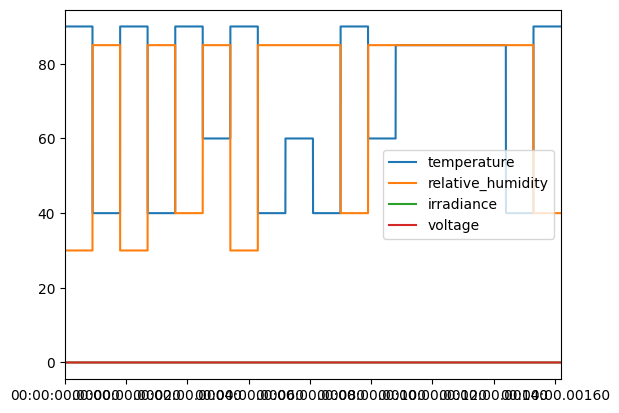

In [3]:
points.plot()

In [4]:
props = pvdeg.stressor.chamber_properties(
    set_point_df=points, 
    tau=10, 
    chamber_irrad_0=0, 
    sample_temp_0=15,
    eva_solubility=0.17337995,
    solubility_prefactor=1.81390702,
    pet_permiability=0.553059381,
    pet_prefactor=674449898.1,
    thickness_eva=0.4572,
    thickness_pet=0.1016,
    )

In [5]:
props

,water_vapor_pressure,dew_point,sample_temperature,rh_at_sample_temp,equilibrium_eva_water
0 days 00:00:00,21.050473,61.168821,15,1264,0.021278
0 days 00:01:00,21.050473,61.168821,22,800,0.015892
0 days 00:02:00,21.050473,61.168821,28,552,0.012561
0 days 00:03:00,21.050473,61.168821,33,412,0.010456
0 days 00:04:00,21.050473,61.168821,38,311,0.008772
...,...,...,...,...,...
18 days 17:55:00,28.067297,67.623687,80,58,0.003530
18 days 17:56:00,28.067297,67.623687,80,58,0.003530
18 days 17:57:00,28.067297,67.623687,80,58,0.003530
18 days 17:58:00,28.067297,67.623687,80,58,0.003530


In [9]:
backsheet_eva_moisture_content = pvdeg.humidity.moisture_eva_back(
        eva_moisture_0=props['equilibrium_eva_water'].iloc[0],
        sample_temp=props['sample_temperature'],
        rh_at_sample_temp=props['rh_at_sample_temp'],
        equilibrium_eva_water=props['equilibrium_eva_water'],
        pet_permiability=0.553059381,
        pet_prefactor=674449898.1,
        thickness_eva=0.4572,
        thickness_pet=0.1016,
        n_steps=20
)

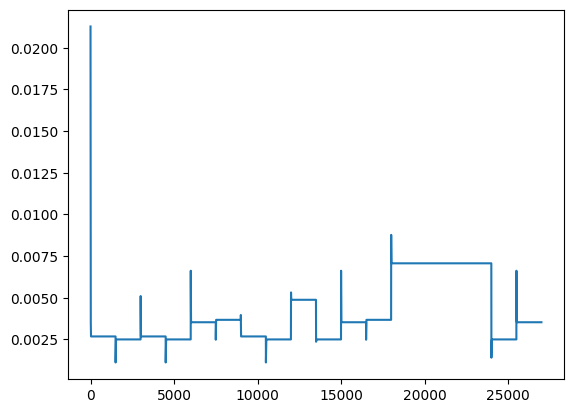

In [8]:
import matplotlib.pyplot as plt
plt.plot(backsheet_eva_moisture_content)